# **CSST 106** - Perception and Computer Vision

**Name:** Cayadong, Marjelaine M.

**Program, Year & Section:** BSCS - 4B

**Install Other Necessary Libraries**

In [12]:
!pip uninstall -y opencv-python opencv-python-headless opencv-contrib-python

Found existing installation: opencv-python 4.10.0.84
Uninstalling opencv-python-4.10.0.84:
  Successfully uninstalled opencv-python-4.10.0.84
Found existing installation: opencv-python-headless 4.10.0.84
Uninstalling opencv-python-headless-4.10.0.84:
  Successfully uninstalled opencv-python-headless-4.10.0.84
Found existing installation: opencv-contrib-python 4.10.0.84
Uninstalling opencv-contrib-python-4.10.0.84:
  Successfully uninstalled opencv-contrib-python-4.10.0.84


In [13]:
!apt-get install -y cmake
!apt-get install -y libopencv-dev build-essential cmake git pkg-config libgtk-3-dev \
   libavcodec-dev libavformat-dev libswscale-dev libtbb2 libtbb-dev libjpeg-dev \
   libpng-dev libtiff-dev libdc1394-22-dev libv4l-dev v4l-utils \
   libxvidcore-dev libx264-dev libxine2-dev gstreamer1.0-tools \
   libgstreamer-plugins-base1.0-dev libgstreamer-plugins-good1.0-dev \
   libgtk2.0-dev libtiff5-dev libopenexr-dev libatlas-base-dev \
   python3-dev python3-numpy libtbb-dev libeigen3-dev \
   libfaac-dev libmp3lame-dev libtheora-dev libvorbis-dev \
   libxvidcore-dev libx264-dev yasm libopencore-amrnb-dev \
   libopencore-amrwb-dev libv4l-dev libxine2-dev libtesseract-dev \
   liblapacke-dev libopenblas-dev checkinstall


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
cmake is already the newest version (3.22.1-1ubuntu1.22.04.2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package libdc1394-22-dev


In [14]:
!git clone https://github.com/opencv/opencv.git
!git clone https://github.com/opencv/opencv_contrib.git

Cloning into 'opencv'...
remote: Enumerating objects: 336248, done.
remote: Counting objects: 100% (1016/1016), done.
remote: Compressing objects: 100% (815/815), done.
remote: Total 336248 (delta 424), reused 607 (delta 171), pack-reused 335232 (from 1)
Receiving objects: 100% (336248/336248), 527.23 MiB | 21.82 MiB/s, done.
Resolving deltas: 100% (234395/234395), done.
Updating files: 100% (7567/7567), done.
Cloning into 'opencv_contrib'...
remote: Enumerating objects: 41556, done.
remote: Counting objects: 100% (1315/1315), done.
remote: Compressing objects: 100% (952/952), done.
remote: Total 41556 (delta 496), reused 916 (delta 288), pack-reused 40241 (from 1)
Receiving objects: 100% (41556/41556), 149.98 MiB | 28.83 MiB/s, done.
Resolving deltas: 100% (25628/25628), done.


In [15]:
%cd opencv
!mkdir build
%cd build

!cmake -D CMAKE_BUILD_TYPE=RELEASE \
       -D CMAKE_INSTALL_PREFIX=/usr/local \
       -D OPENCV_ENABLE_NONFREE=ON \
       -D OPENCV_EXTRA_MODULES_PATH=../../opencv_contrib/modules \
       -D BUILD_EXAMPLES=ON ..

!make -j8
!make install

Streaming output truncated to the last 5000 lines.
[  7%] Building CXX object modules/hdf/CMakeFiles/opencv_hdf.dir/src/hdf5.cpp.o
[  7%] Building CXX object modules/ml/CMakeFiles/opencv_ml.dir/src/ann_mlp.cpp.o
[  7%] Building CXX object apps/version/CMakeFiles/opencv_version.dir/opencv_version.cpp.o
[  7%] Building CXX object modules/imgproc/CMakeFiles/opencv_imgproc.dir/src/accum.cpp.o
[  7%] Linking CXX executable ../../bin/opencv_version
[  7%] Linking CXX shared library ../../lib/libopencv_signal.so
[  7%] Building CXX object modules/imgproc/CMakeFiles/opencv_imgproc.dir/src/accum.dispatch.cpp.o
[  7%] Built target opencv_version
[  7%] Building CXX object modules/imgproc/CMakeFiles/opencv_imgproc.dir/src/approx.cpp.o
[  7%] Built target opencv_signal
[  7%] Building CXX object modules/imgproc/CMakeFiles/opencv_imgproc.dir/src/bilateral_filter.dispatch.cpp.o
[  7%] Building CXX object modules/imgproc/CMakeFiles/opencv_imgproc.dir/src/blend.cpp.o
[  7%] Linking CXX shared library 

In [19]:
!pip install opencv-python-headless

  Using cached opencv_python_headless-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
Using cached opencv_python_headless-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (49.9 MB)


**Task 1: SIFT Feature Extraction**

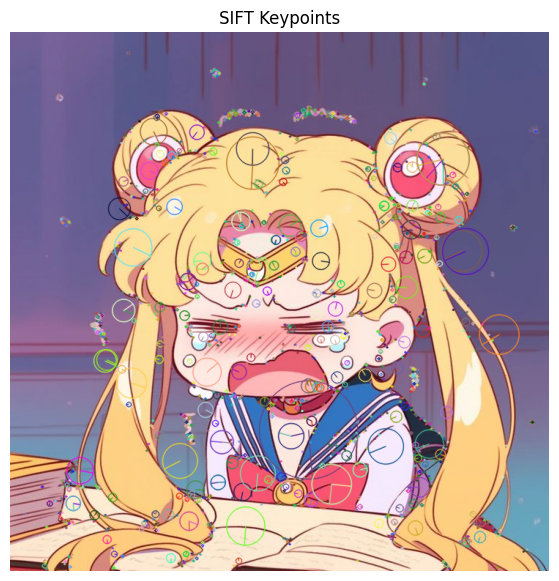

In [1]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('Usagi.jpg')

# Check if the image is loaded properly
if image is None:
    raise ValueError("Image not found. Check the file path.")

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and descriptors
keypoints, descriptors = sift.detectAndCompute(gray_image, None)

# Draw keypoints on the image (with size and orientation)
image_with_keypoints = cv2.drawKeypoints(
    image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

# Display the image with keypoints
plt.figure(figsize=(10, 7))
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('SIFT Keypoints')
plt.axis('off')  # Hide the axis
plt.show()

**Task 2: SURF Feature Extraction**

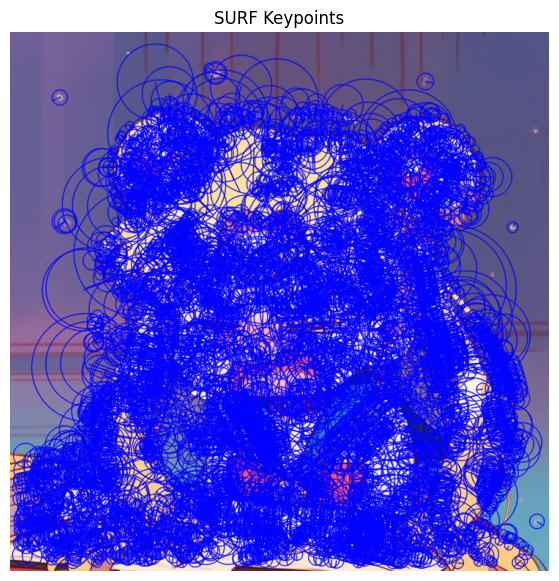

In [3]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('Usagi.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initialize SURF detector
surf = cv2.xfeatures2d.SURF_create()

# Detect keypoints and descriptors
keypoints, descriptors = surf.detectAndCompute(gray_image, None)

# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(
    image, keypoints, None, (255, 0, 0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

# Display the image with keypoints
plt.figure(figsize=(10, 7))
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB)) # Changed image_with_keypoints2 to image_with_keypoints
plt.title('SURF Keypoints')
plt.axis('off')
plt.show()

**Task 3: ORB Feature Extraction**

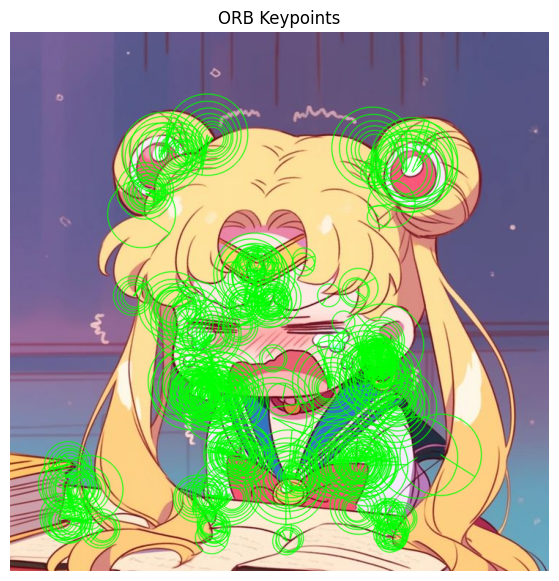

In [4]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('Usagi.jpg')

# Check if the image is loaded properly
if image is None:
    raise ValueError("Image not found. Check the file path.")

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initialize ORB detector
orb = cv2.ORB_create()

# Detect keypoints and descriptors
keypoints, descriptors = orb.detectAndCompute(gray_image, None)

# Draw keypoints on the image with keypoint size and orientation
image_with_keypoints = cv2.drawKeypoints(
    image, keypoints, None, (0, 255, 0), flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS
)

# Display the image with keypoints
plt.figure(figsize=(10, 7))
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('ORB Keypoints')
plt.axis('off')
plt.show()

**Task 4: Feature Matching**

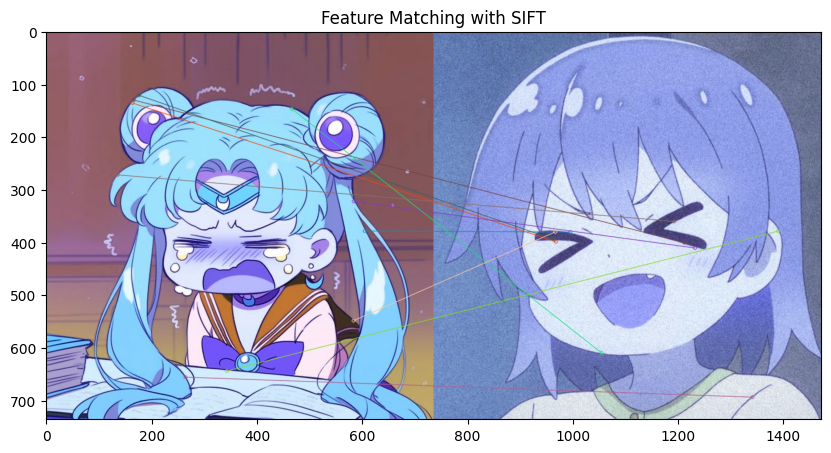

In [6]:
import cv2
import matplotlib.pyplot as plt

#Load 2 images
image1 = cv2.imread('Usagi.jpg')
image2 = cv2.imread('Chiharu.jpg')

#Initialize SIFT detector
sift = cv2.SIFT_create()

#Find keypoints and descriptors with SIFT
keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

#Initialize the matcher
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

#Match descriptors
matches = bf.match(descriptors1, descriptors2)

#Sort matches by distance (best matches first)
matches = sorted(matches, key=lambda x: x.distance)

#Draw matches
image_matches = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

#Display the image with matches
plt.figure(figsize=(10, 7))
plt.imshow(image_matches)
plt.title('Feature Matching with SIFT')
plt.show()

**Task 5: Applications of Feature Matching**

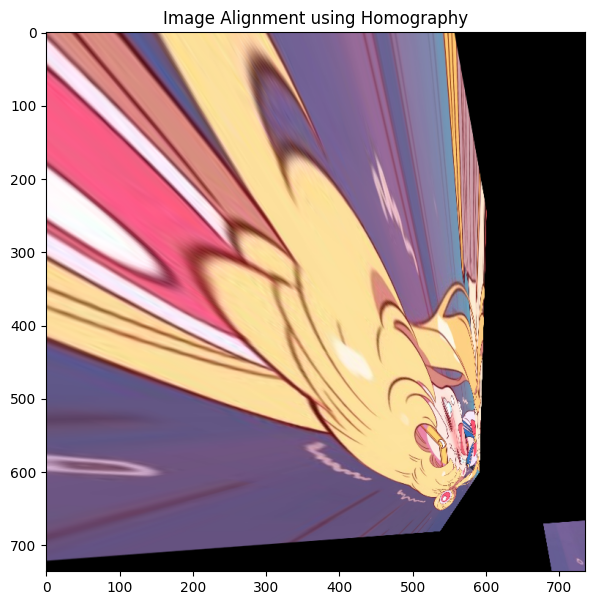

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

#Load two images
image1 =cv2.imread('Usagi.jpg')
image2 = cv2.imread('Chiharu.jpg')

#Convert to grayscale
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

#Detect keypoints and descriptors using SIFT
sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

#Match features using BFMatcher
bf = cv2.BFMatcher()
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

#Apply ratio test (Lowe's ratio test)
good_matches = []
for m, n in matches:
  if m.distance <0.75 * n.distance:
    good_matches.append(m)

#Extract location of good matches
src_pts = np.float32(
    [keypoints1[m.queryIdx].pt for m in good_matches]
).reshape(-1, 1, 2)
dst_pts = np.float32(
    [keypoints2[m.trainIdx].pt for m in good_matches]
).reshape(-1, 1, 2)

#Find homography matrix
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

#Warp one image to align with the other
h, w, _ = image1.shape
result = cv2.warpPerspective(image1, M, (w, h))

#Display the result
plt.figure(figsize=(10, 7))
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Image Alignment using Homography')
plt.show()

**Task 6: Combining Feature Extraction Methods**


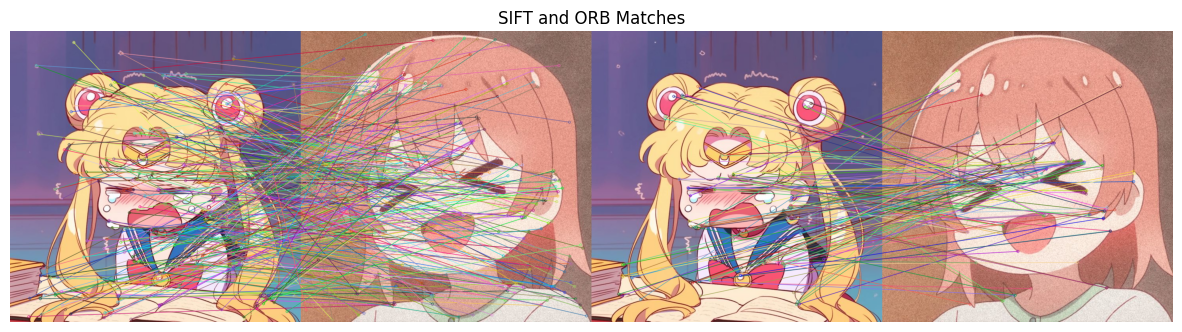

In [9]:
import cv2
import matplotlib.pyplot as plt

# Load two images
image1 = cv2.imread('Usagi.jpg')
image2 = cv2.imread('Chiharu.jpg')

# Initialize SIFT and ORB detectors
sift = cv2.SIFT_create()
orb = cv2.ORB_create()

# Detect and compute SIFT features
keypoints1_sift, descriptors1_sift = sift.detectAndCompute(image1, None)
keypoints2_sift, descriptors2_sift = sift.detectAndCompute(image2, None)

# Detect and compute ORB features
keypoints1_orb, descriptors1_orb = orb.detectAndCompute(image1, None)
keypoints2_orb, descriptors2_orb = orb.detectAndCompute(image2, None)

# Match SIFT descriptors using Brute Force Matcher
bf_sift = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches_sift = bf_sift.match(descriptors1_sift, descriptors2_sift)

# Match ORB descriptors using Brute Force Matcher
bf_orb = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches_orb = bf_orb.match(descriptors1_orb, descriptors2_orb)

# Draw matches
image_matches_sift = cv2.drawMatches(image1, keypoints1_sift, image2, keypoints2_sift, matches_sift, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
image_matches_orb = cv2.drawMatches(image1, keypoints1_orb, image2, keypoints2_orb, matches_orb, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Combine the matched images for display
combined_image = cv2.hconcat([image_matches_sift, image_matches_orb])

# Display the combined result
plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB))
plt.title('SIFT and ORB Matches')
plt.axis('off')
plt.show()
